이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [24]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
len(test_labels)

10000

In [30]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**컴파일 단계**

In [32]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [33]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**모델 훈련**

In [34]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2694 - accuracy: 0.9220
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9880


**모델을 사용해 예측 만들기**

In [35]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 53ms/step


array([3.3438843e-07, 2.0865620e-08, 4.5337089e-05, 7.2763301e-05,
       3.1050169e-11, 1.2524531e-07, 1.4152874e-11, 9.9987841e-01,
       5.9312561e-07, 2.4361207e-06], dtype=float32)

In [36]:
predictions[0].argmax()

7

In [37]:
predictions[0][7]

0.9998784

In [38]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9802
테스트 정확도: 0.9801999926567078


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [40]:
import numpy as np
x = np.array(12)
x

array(12)

In [41]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [42]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [43]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [44]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [45]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 핵심 속성

In [46]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
train_images.ndim

3

In [48]:
train_images.shape

(60000, 28, 28)

In [49]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 출력하기**

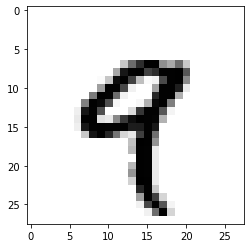

In [50]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [51]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [52]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [53]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [54]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [55]:
my_slice = train_images[:, 14:, 14:]

In [56]:
my_slice = train_images[:, 7:-7, 7:-7]

### 배치 데이터

In [57]:
batch = train_images[:128]

In [58]:
batch = train_images[128:256]

In [59]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [60]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [61]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [62]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [63]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.48 s


### 브로드캐스팅

In [64]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [65]:
y = np.expand_dims(y, axis=0)

In [66]:
Y = np.concatenate([y] * 32, axis=0)

In [67]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [68]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 텐서 곱셈

In [69]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [70]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [71]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [72]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [73]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [74]:
train_images = train_images.reshape((60000, 28 * 28))

In [75]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [76]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [77]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [78]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [79]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [80]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [81]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## 첫 번째 예제 다시 살펴보기

In [83]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [84]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [85]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [86]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2646 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1064 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9882


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [87]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

#    @property
    def weights(self):
        return [self.W, self.b]

In [97]:
dense1 = NaiveDense(5,3,activation=tf.nn.relu)

In [98]:
dense1.W

<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[0.09500648, 0.09443056, 0.00863109],
       [0.09876897, 0.08117881, 0.02878655],
       [0.00769883, 0.01504546, 0.00686286],
       [0.04411856, 0.04336593, 0.09879451],
       [0.0130958 , 0.06683508, 0.00628431]], dtype=float32)>

In [99]:
dense1.activation

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [100]:
dense1.weights

[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
 array([[0.09500648, 0.09443056, 0.00863109],
        [0.09876897, 0.08117881, 0.02878655],
        [0.00769883, 0.01504546, 0.00686286],
        [0.04411856, 0.04336593, 0.09879451],
        [0.0130958 , 0.06683508, 0.00628431]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

#### 단순한 Sequential 클래스

In [103]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [104]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [106]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.02590168, 0.05323067, 0.08126154, ..., 0.05305358, 0.02339092,
         0.0208956 ],
        [0.02329636, 0.07279482, 0.04718543, ..., 0.00531451, 0.06495656,
         0.00325069],
        [0.09659052, 0.04430978, 0.01056085, ..., 0.09861672, 0.09784516,
         0.03425925],
        ...,
        [0.0879757 , 0.05999533, 0.02100509, ..., 0.00916352, 0.0270389 ,
         0.03986493],
        [0.0342144 , 0.09410268, 0.0229014 , ..., 0.0508137 , 0.01540567,
         0.03991253],
        [0.09664046, 0.0491781 , 0.01163775, ..., 0.0336371 , 0.08860581,
         0.01076554]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

#### 배치 제너레이터

In [111]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)   

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [113]:
generator1 = BatchGenerator(train_images, train_labels)

In [114]:
generator1.num_batches

469

### 훈련 스텝 실행하기

In [91]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [92]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [93]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [94]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [95]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 5.75
100번째 배치 손실: 2.24
200번째 배치 손실: 2.18
300번째 배치 손실: 2.07
400번째 배치 손실: 2.18
에포크 1
0번째 배치 손실: 1.88
100번째 배치 손실: 1.88
200번째 배치 손실: 1.80
300번째 배치 손실: 1.69
400번째 배치 손실: 1.79
에포크 2
0번째 배치 손실: 1.55
100번째 배치 손실: 1.58
200번째 배치 손실: 1.48
300번째 배치 손실: 1.41
400번째 배치 손실: 1.48
에포크 3
0번째 배치 손실: 1.29
100번째 배치 손실: 1.34
200번째 배치 손실: 1.22
300번째 배치 손실: 1.20
400번째 배치 손실: 1.25
에포크 4
0번째 배치 손실: 1.10
100번째 배치 손실: 1.16
200번째 배치 손실: 1.02
300번째 배치 손실: 1.04
400번째 배치 손실: 1.08
에포크 5
0번째 배치 손실: 0.95
100번째 배치 손실: 1.02
200번째 배치 손실: 0.88
300번째 배치 손실: 0.93
400번째 배치 손실: 0.97
에포크 6
0번째 배치 손실: 0.85
100번째 배치 손실: 0.92
200번째 배치 손실: 0.78
300번째 배치 손실: 0.84
400번째 배치 손실: 0.88
에포크 7
0번째 배치 손실: 0.77
100번째 배치 손실: 0.84
200번째 배치 손실: 0.71
300번째 배치 손실: 0.77
400번째 배치 손실: 0.81
에포크 8
0번째 배치 손실: 0.71
100번째 배치 손실: 0.77
200번째 배치 손실: 0.65
300번째 배치 손실: 0.71
400번째 배치 손실: 0.76
에포크 9
0번째 배치 손실: 0.66
100번째 배치 손실: 0.72
200번째 배치 손실: 0.60
300번째 배치 손실: 0.67
400번째 배치 손실: 0.72


### 모델 평가하기

In [96]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82


## 요약